224329011 Ahmet Muratoğlu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow # cv2_imshow'u içe aktar

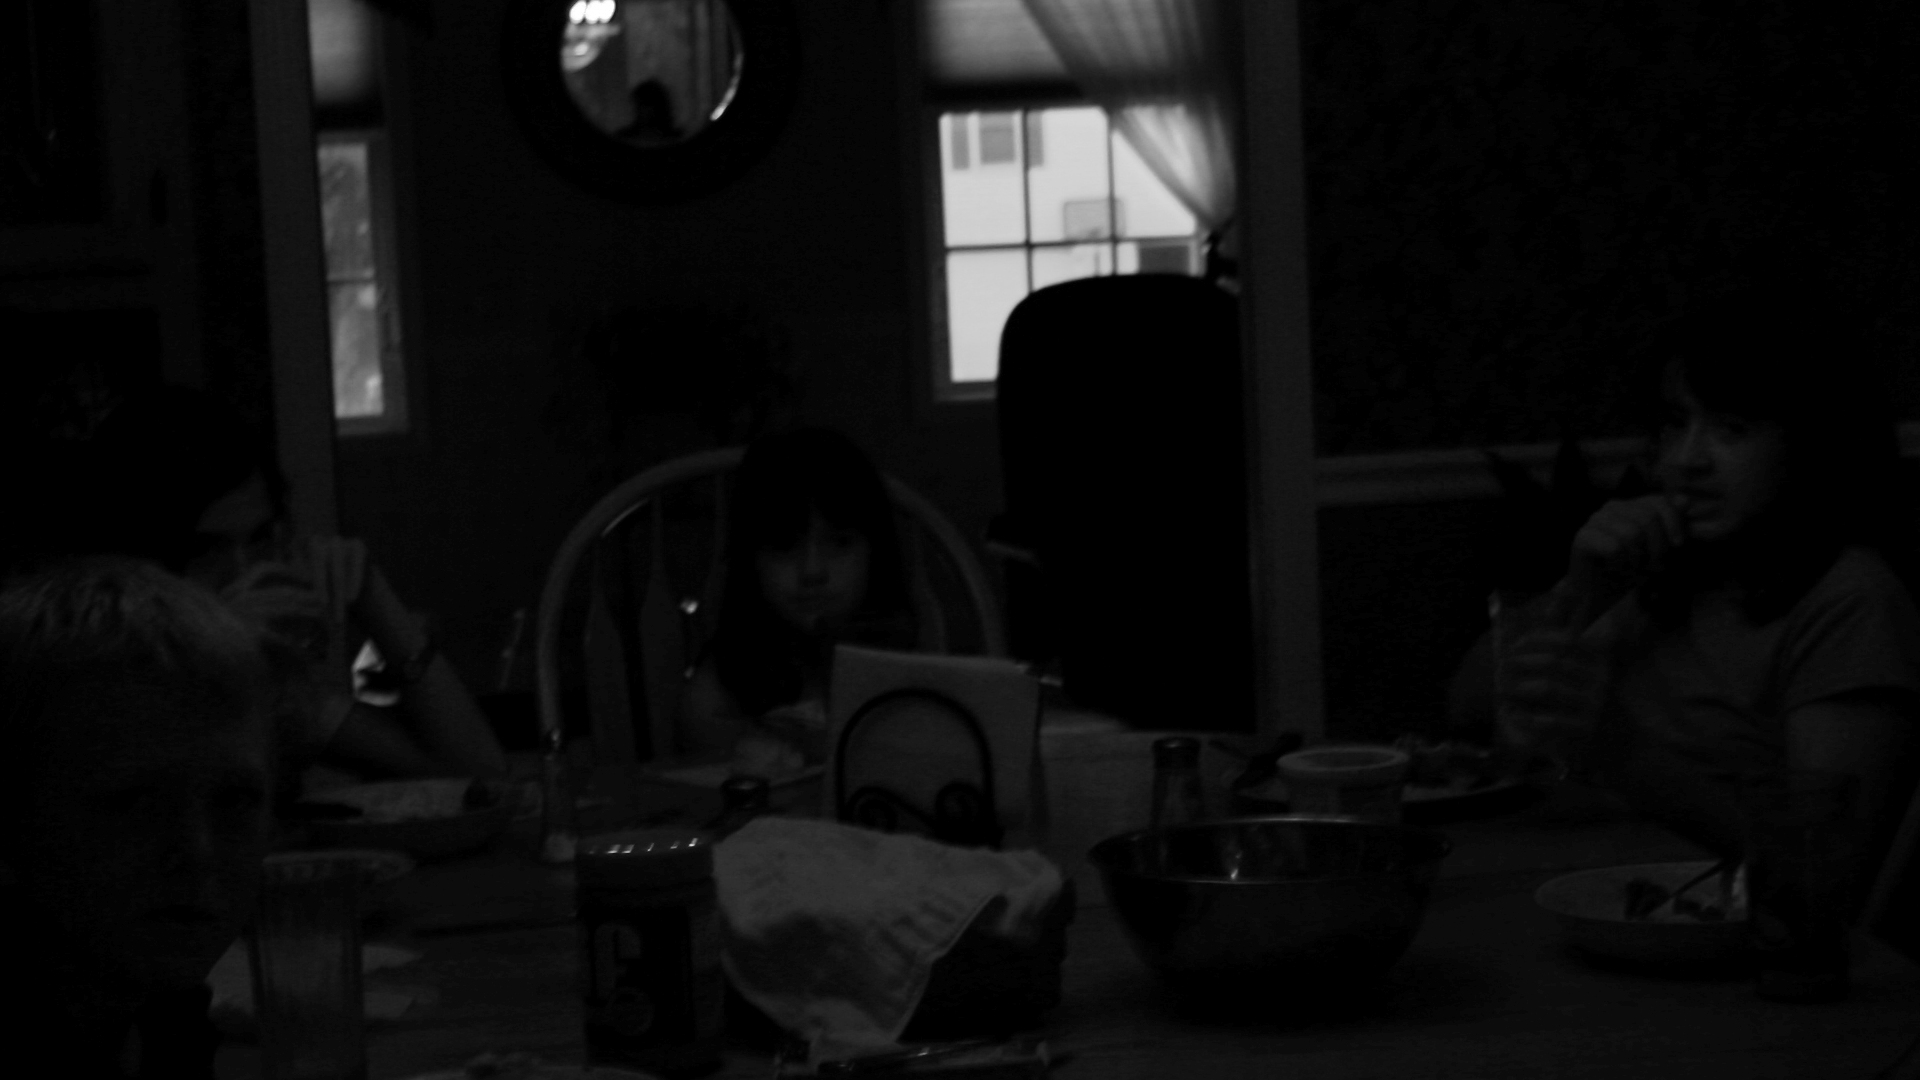

In [ ]:
# Görüntüyü yükleme
image = cv2.imread('/content/drive/MyDrive/YZM507/goruntu3.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

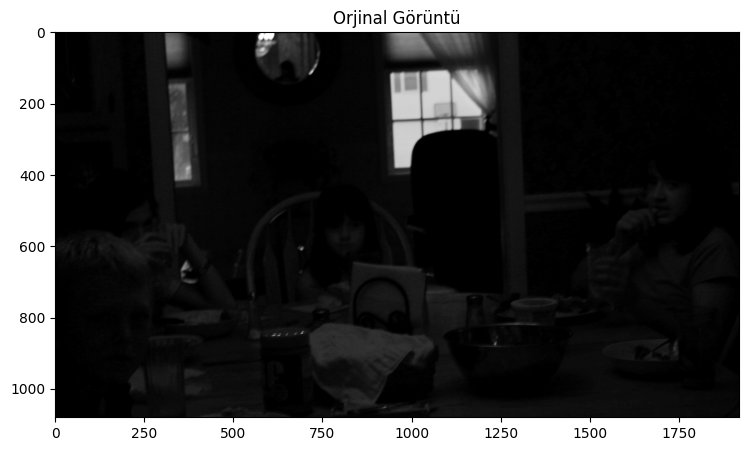

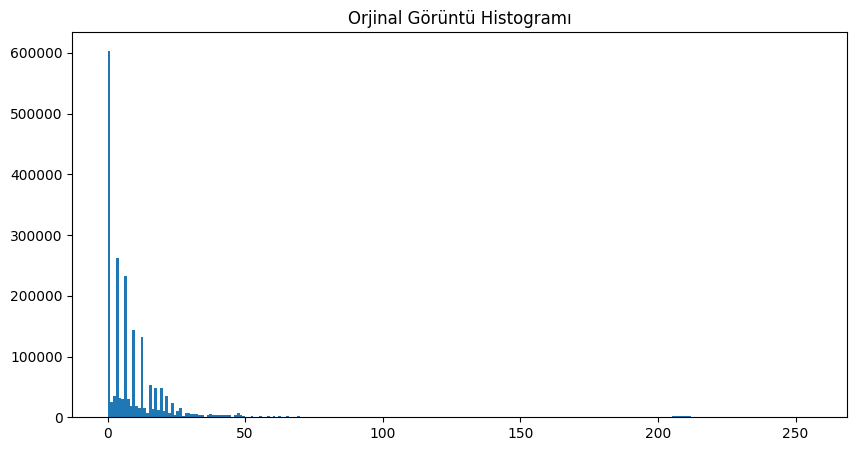

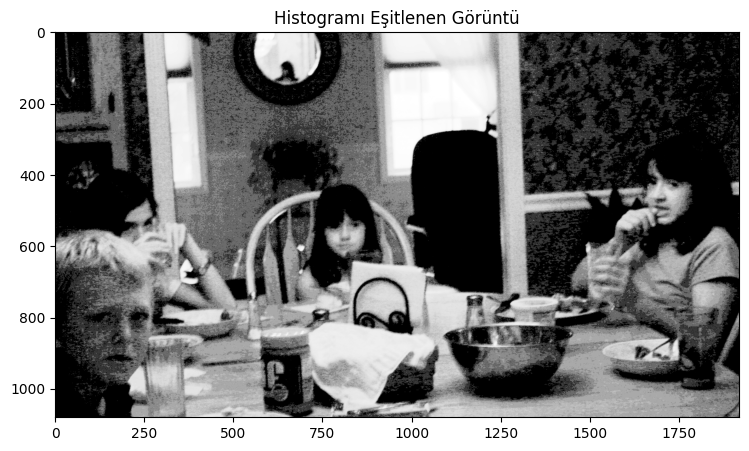

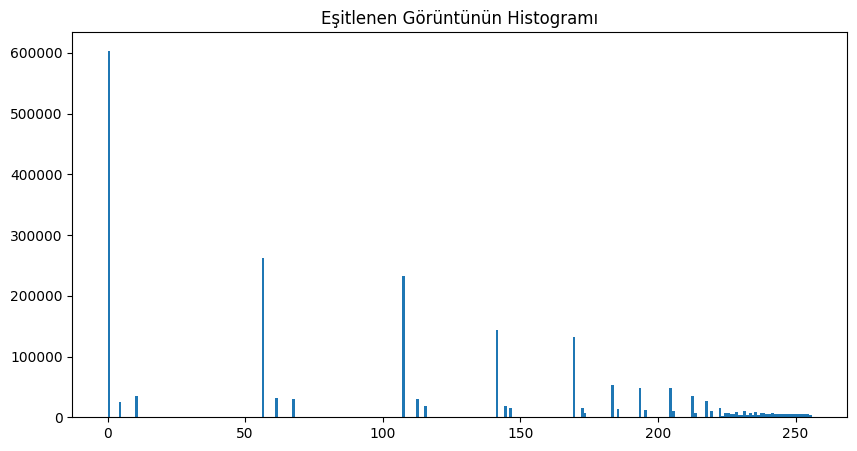

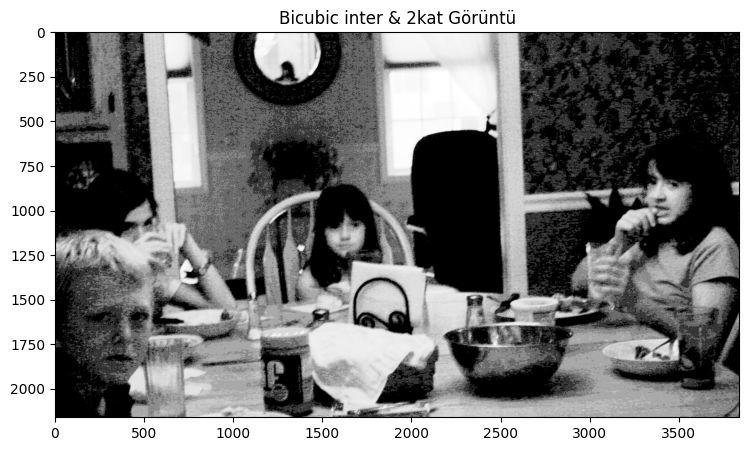

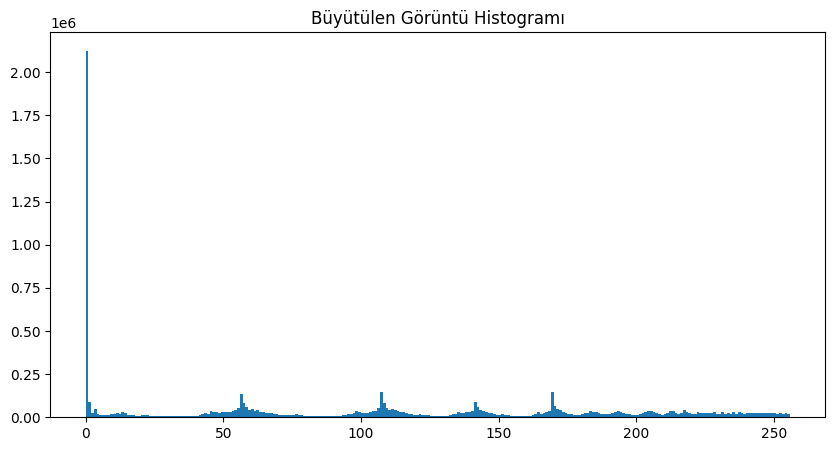

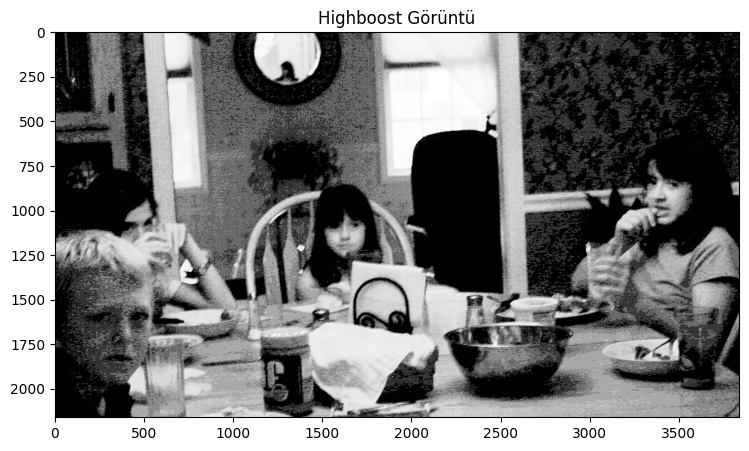

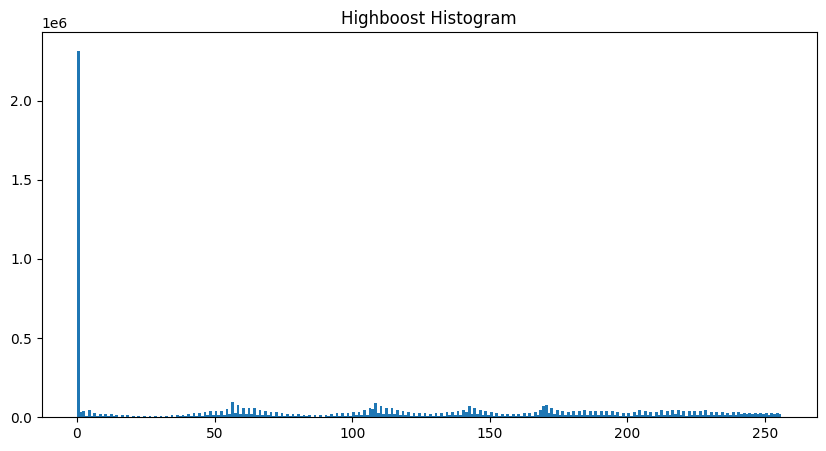

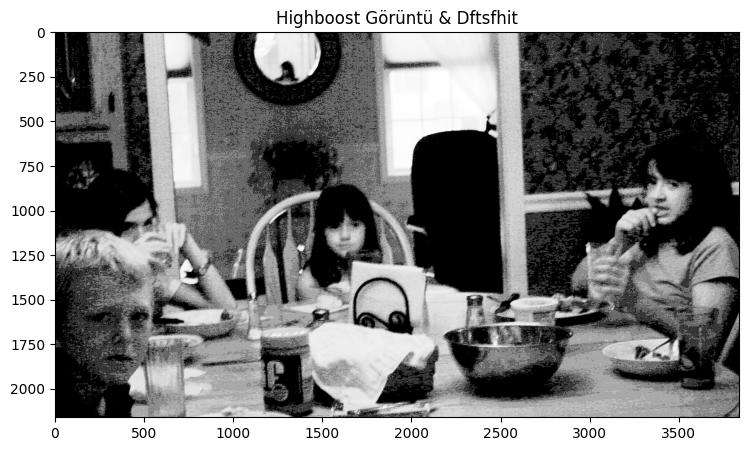

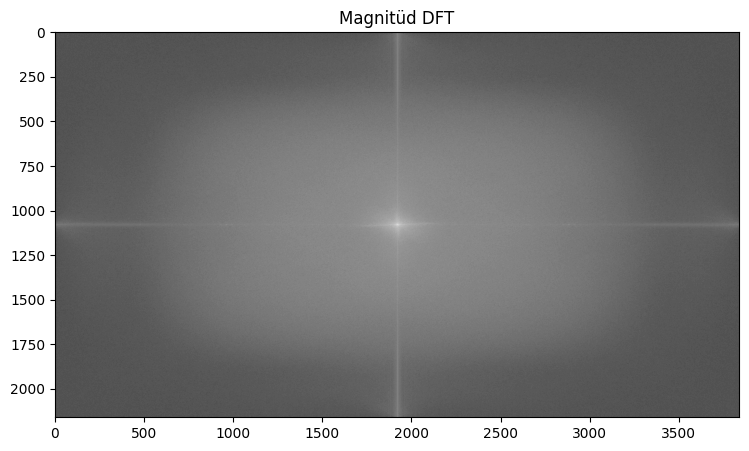

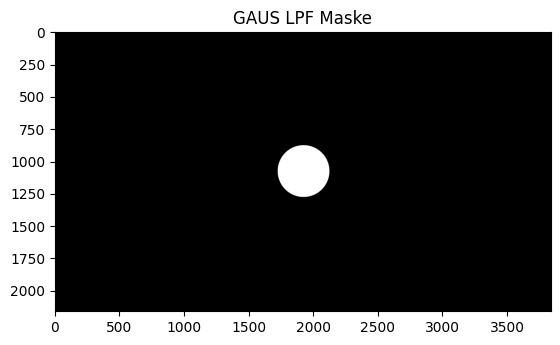

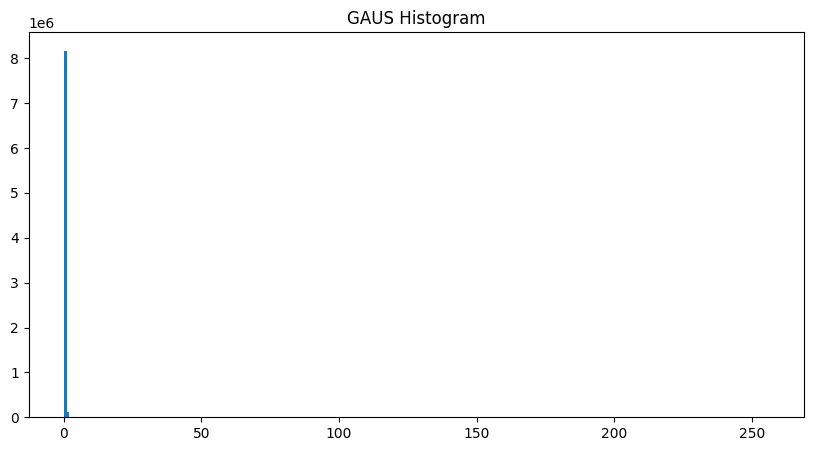

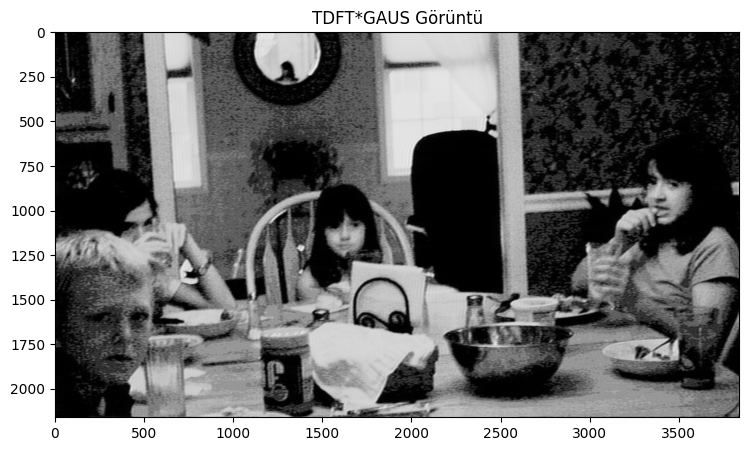

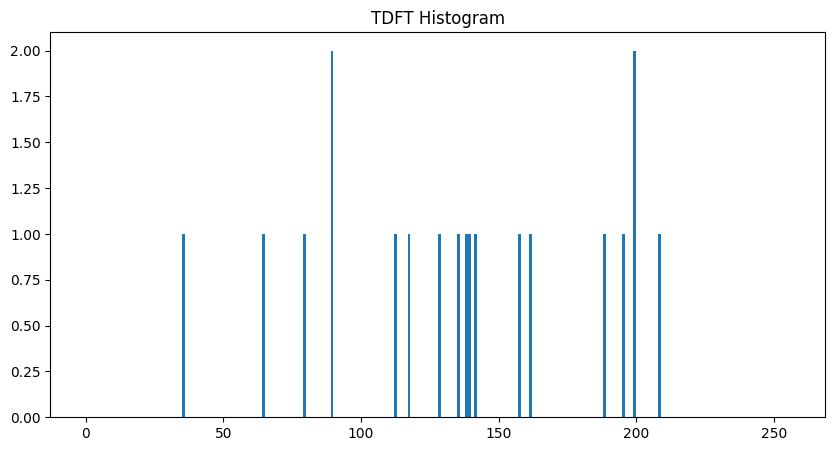

In [ ]:

# Görüntüyü yükleme ve histogramını çizdirme
image = cv2.imread('/content/drive/MyDrive/YZM507/goruntu3.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))
plt.imshow(image, cmap='gray')
plt.title('Orjinal Görüntü')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Orjinal Görüntü Histogramı')
plt.show()

# Histogram eşitlemesi yapılmış görüntü ve histogramını çizdirme

equalized_image = cv2.equalizeHist(image)
plt.figure(figsize=(10, 5))
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogramı Eşitlenen Görüntü')
plt.show()


plt.figure(figsize=(10, 5))
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Eşitlenen Görüntünün Histogramı')
plt.show()


# Görüntüye bicubic interpolasyon ile iki kat büyütme ve histogramını çizdirme
resized_image = cv2.resize(equalized_image, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(10, 5))
plt.imshow(resized_image, cmap='gray')
plt.title('Bicubic inter & 2kat Görüntü')
plt.show()


plt.figure(figsize=(10, 5))
plt.hist(resized_image.ravel(), 256, [0, 256])
plt.title('Büyütülen Görüntü Histogramı')
plt.show()

# Görüntüye unsharp masking ve highboost filtering uygulama ve histogramını çizdirme
blurred = cv2.GaussianBlur(resized_image, (9, 9), 10)
unsharp_image = cv2.addWeighted(resized_image, 1.5, blurred, -0.5, 0)
plt.figure(figsize=(10, 5))
plt.imshow(unsharp_image, cmap='gray')
plt.title('Highboost Görüntü')
plt.show()


plt.figure(figsize=(10, 5))
plt.hist(unsharp_image.ravel(), 256, [0, 256])
plt.title('Highboost Histogram')
plt.show()

# Highboost filtrelenmiş görüntü sonucunun DFT'sini alma, DFT'yi shift etme ve genlik spektrumunu çizdirme
dft = cv2.dft(np.float32(unsharp_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
plt.figure(figsize=(10, 5))
plt.imshow(unsharp_image, cmap='gray')
plt.title('Highboost Görüntü & Dftsfhit')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitüd DFT')
plt.show()

# Görüntüye yarıçapı 200 olan Gaussian alçak geçiren filtre uygulama ve filtresini çizdirme
rows, cols = unsharp_image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
Y, X = np.ogrid[:rows, :cols]
dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
mask_area = dist_from_center <= 200
mask[mask_area] = 1

# Maskenin görselini gösteriyoruz
mask_visual = mask[:, :, 0]  # İlk kanalı alıyoruz
#cv2_imshow(mask_visual)
plt.imshow(mask_visual, cmap='gray')
plt.title('GAUS LPF Maske')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(mask_visual.ravel(), 256, [0, 256])
plt.title('GAUS Histogram')
plt.show()


# Görüntünün ters DFT'sini alıp görüntünün son hali ve histogramını çizdirme

fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(10, 5))
plt.imshow(img_back, cmap='gray')
plt.title('TDFT*GAUS Görüntü')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(img_back.ravel(), 256, [0, 256])
plt.title('TDFT Histogram')
plt.show()
